In [361]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Objetivo_1: Previsão de demanda dos produtos para os proximos 5 meses

## Carregando os Dados 

In [36]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [37]:
# Variaveis selecionadas

demand = dados[['order date (DateOrders)',
                'Order Id','Product Price']]
demand.head(3)

,order date (DateOrders),Order Id,Product Price
0,1/31/2018 22:56,77202,327.75
1,1/13/2018 12:27,75939,327.75
2,1/13/2018 12:06,75938,327.75


# Dicionário de Dados das variáveis Selecionadas

**$$Variáveis:$$**

**-order date (DateOrders):** Data que foi processado o pedido

**-Order Id:** Numero da Ordem do Pedido
    
**-Product Price:** Preço do produto

In [38]:
# Função para extrair somente os primeiros numeros da variável
def extrai_data(x):
    return x[:9]
# Extrai ano e mês da coluna de data
demand['order date (DateOrders)'] = demand['order date (DateOrders)'].apply(extrai_data)

**Função para selecionar apenas os anos, meses e dias**

In [42]:
# Transforamar a coluna de data Str em Datetime
demand['order date (DateOrders)']= pd.to_datetime(demand['order date (DateOrders)'], errors = 'coerce')
demand.head(3)

,order date (DateOrders),Order Id,Product Price
0,2018-01-31,77202,327.75
1,2018-01-13,75939,327.75
2,2018-01-13,75938,327.75


**Transformar o tipo da variável 'order date (DateOrders)' em datetime**

In [46]:
#Data de inicio e fim do pedido
print(demand['order date (DateOrders)'].min())
print(demand['order date (DateOrders)'].max())

2015-01-01 00:00:00
2018-01-31 00:00:00


In [47]:
#Quantidade de pedido
len(demand['Order Id'].unique())


65752

In [48]:
# Agrupar os dados por dia
data_pedido = demand.groupby(['order date (DateOrders)']).sum().reset_index()
data_pedido

,order date (DateOrders),Order Id,Product Price
0,2015-01-01,5486,23117.000611
1,2015-01-02,16163,19101.200493
2,2015-01-03,30712,24519.850592
3,2015-01-04,45946,23611.930567
4,2015-01-05,49401,19401.090491
...,...,...,...
927,2018-01-27,5228962,14675.760496
928,2018-01-28,5310585,14891.580504
929,2018-01-29,5238278,14675.760496
930,2018-01-30,5320038,14891.580504


# Plots

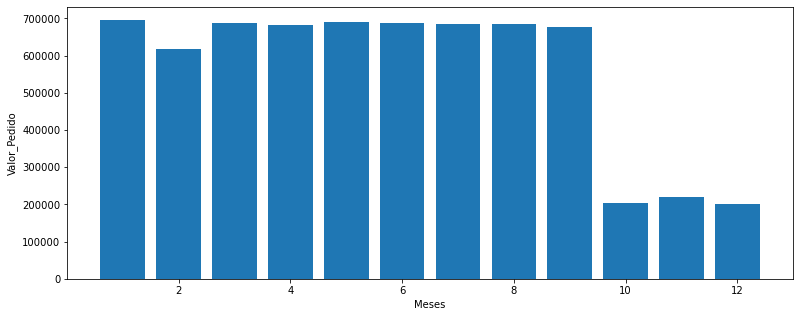

In [9]:
# Agrupar os dados por Mês de 2015
mes_ano = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2015-12-31')
mes_ano = data_pedido[mes_ano]
mes_ano = pd.DataFrame(mes_ano.groupby(mes_ano['order date (DateOrders)'].dt.month)['Product Price'].sum())

#Plot
plt.figure(figsize=(13, 5))
plt.bar(mes_ano.index,mes_ano['Product Price'])
plt.xlabel('Meses')
plt.ylabel('Valor_Pedido');

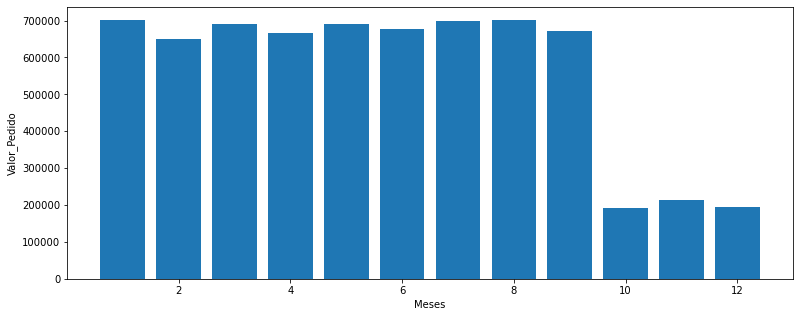

In [10]:
# Agrupar os dados por Mês de 2016
mes_ano = (data_pedido['order date (DateOrders)'] >= '2016-01-01') & (data_pedido['order date (DateOrders)'] <= '2016-12-31')
mes_ano = data_pedido[mes_ano]
mes_ano = pd.DataFrame(mes_ano.groupby(mes_ano['order date (DateOrders)'].dt.month)['Product Price'].sum())

#Plot
plt.figure(figsize=(13, 5))
plt.bar(mes_ano.index,mes_ano['Product Price'])
plt.xlabel('Meses')
plt.ylabel('Valor_Pedido');

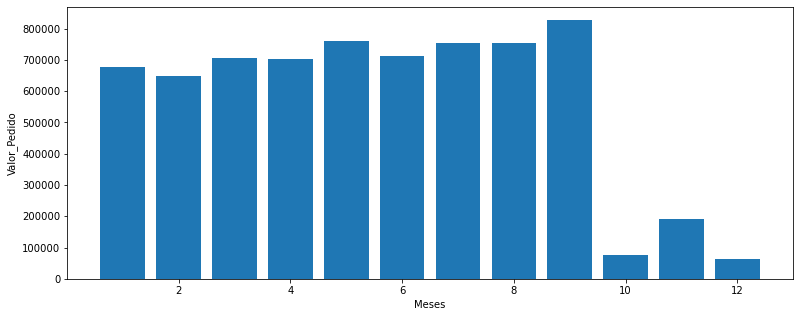

In [11]:
# Agrupar os dados por Mês de 2017
mes_ano = (data_pedido['order date (DateOrders)'] >= '2017-01-01') & (data_pedido['order date (DateOrders)'] <= '2017-12-31')
mes_ano = data_pedido[mes_ano]
mes_ano = pd.DataFrame(mes_ano.groupby(mes_ano['order date (DateOrders)'].dt.month)['Product Price'].sum())

#Plot
plt.figure(figsize=(13, 5))
plt.bar(mes_ano.index,mes_ano['Product Price'])
plt.xlabel('Meses')
plt.ylabel('Valor_Pedido');

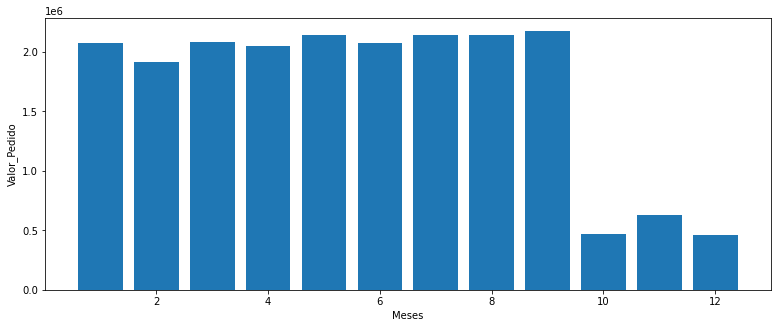

In [12]:
# Agrupar os dados por Mês de 2015 a 2017
mes_ano = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2017-12-31')
mes_ano = data_pedido[mes_ano]
mes_ano = pd.DataFrame(mes_ano.groupby(mes_ano['order date (DateOrders)'].dt.month)['Product Price'].sum())

#Plot
plt.figure(figsize=(13, 5))
plt.bar(mes_ano.index,mes_ano['Product Price'])
plt.xlabel('Meses')
plt.ylabel('Valor_Pedido');

**Note que em todos os anos as vendas seguem o mesmo padrão**

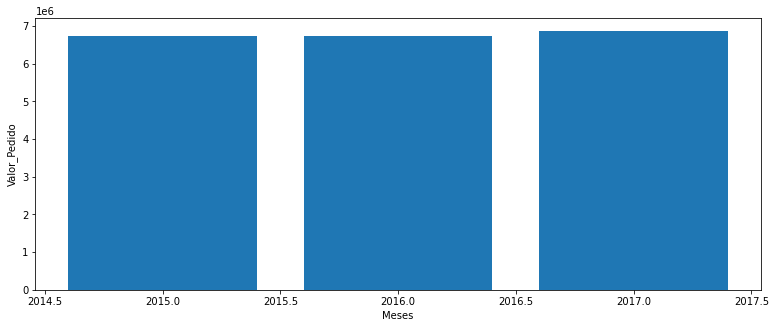

In [49]:
# Agrupar os dados por Ano
ano = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2017-12-31')
ano = data_pedido[ano]
ano = pd.DataFrame(ano.groupby(ano['order date (DateOrders)'].dt.year)['Product Price'].sum()).reset_index()

plt.figure(figsize=(13, 5))
plt.bar(ano['order date (DateOrders)'],ano['Product Price'])
plt.xlabel('Meses')
plt.ylabel('Valor_Pedido');

**Dos 3 anos de registros coletados não houve nenhuma diferença no volume de vendas**

# Previsão

In [50]:
#Agrupar as vendas por mês:

#Ano 2015
mes_ano_15 = (data_pedido['order date (DateOrders)'] >= '2015-01-01') & (data_pedido['order date (DateOrders)'] <= '2015-12-31')
mes_ano_15 = data_pedido[mes_ano_15]
mes_ano_15 = pd.DataFrame(mes_ano_15.groupby(mes_ano_15['order date (DateOrders)'].dt.month)['Product Price'].sum()).reset_index()
mes_ano_15

#Ano 2016
mes_ano_16 = (data_pedido['order date (DateOrders)'] >= '2016-01-01') & (data_pedido['order date (DateOrders)'] <= '2016-12-31')
mes_ano_16 = data_pedido[mes_ano_16]
mes_ano_16 = pd.DataFrame(mes_ano_16.groupby(mes_ano_16['order date (DateOrders)'].dt.month)['Product Price'].sum()).reset_index()
mes_ano_16['order date (DateOrders)'] = range(13,25)

#Ano 2017
mes_ano_17 = (data_pedido['order date (DateOrders)'] >= '2016-01-01') & (data_pedido['order date (DateOrders)'] <= '2016-12-31')
mes_ano_17 = data_pedido[mes_ano_17]
mes_ano_17 = pd.DataFrame(mes_ano_17.groupby(mes_ano_17['order date (DateOrders)'].dt.month)['Product Price'].sum()).reset_index()
mes_ano_17['order date (DateOrders)'] = range(25,37)

#Juntar os Anos em 1 só dataframe
total = pd.concat([mes_ano_15, mes_ano_16])
total = pd.concat([total, mes_ano_17]).reset_index()
total =total.iloc[:,1:].set_index('order date (DateOrders)')
total 

,Product Price
order date (DateOrders),
1,695936.287461
2,617254.795943
3,688674.987211
4,681825.817484
5,689257.647031
6,687196.357350
7,686040.357342
8,685058.247546
9,677782.337374


**Agrupamos os dados pelos ultimos 3 anos(2015,2016 e 2017), pois o ano 2018 houve registro só no mês de janeiro**

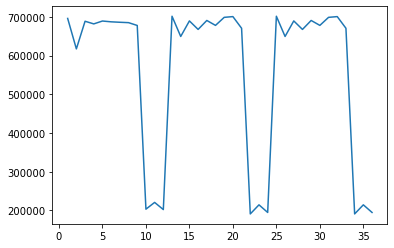

In [15]:
#Plotar o grafico das vendas por mês
plt.plot(total)

**Observe que temos sazonalidade e os dados segue um padrão durante os anos**

<BarContainer object of 36 artists>

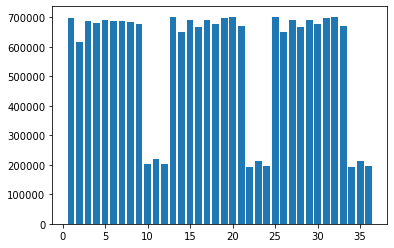

In [16]:
#plot
plt.bar(total.index,total['Product Price'])

**Os 3 anos seguem o mesmo padrão, de Janeiro a Setembro é o maior periodo de vendas, já os meses de Outubro, Novembro e Dezembro as vendas despencam**

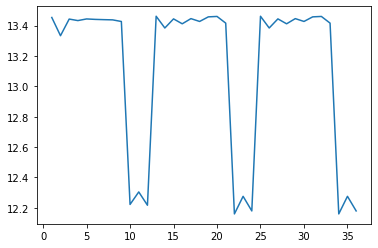

In [53]:
#Log
total['Log']= np.log(total['Product Price'])
plt.plot(total.Log)

**Aplicar o log para diminuir o valor da escala dos dados**

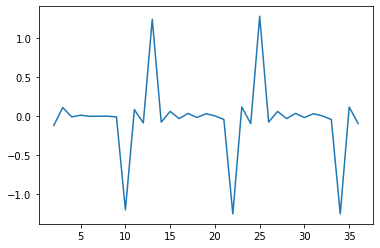

In [54]:
# Aplicar diferenciação para serie ficar estacionaria
total['Diff_1'] = pd.DataFrame(total.Log).diff(1)
plt.plot(total['Diff_1'])

**Serie estacionaria porém com um pouco de sazonalidade**

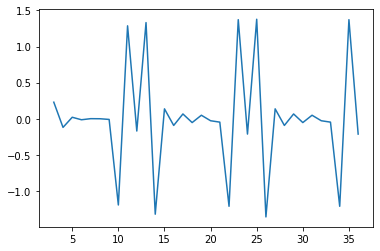

In [55]:
#Aplicar 2 diferenciações
total['Diff_2'] = pd.DataFrame(total.Diff_1).diff(1)
plt.plot(total['Diff_2'])

In [56]:
#Eliminar os NaN provocado pelas diferenciações nos dados
total1 = total.iloc[1:,:]
total2 = total.iloc[2:,:]

In [57]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


a = adfuller(total['Product Price'])[1] 
b = adfuller(total1.Diff_1)[1]
c = adfuller(total2.Diff_2)[1]
print(f'Serie Original: {a}')
print(f'Serie com 1 Diferenciação: {b}')
print(f'Serie com 2 Diferenciações: {c}')

Serie Original: 6.621577258757524e-11
Serie com 1 Diferenciação: 0.0
Serie com 2 Diferenciações: 0.0


**Serie estacionaria tanto com 1 ou 2 diferenciações**

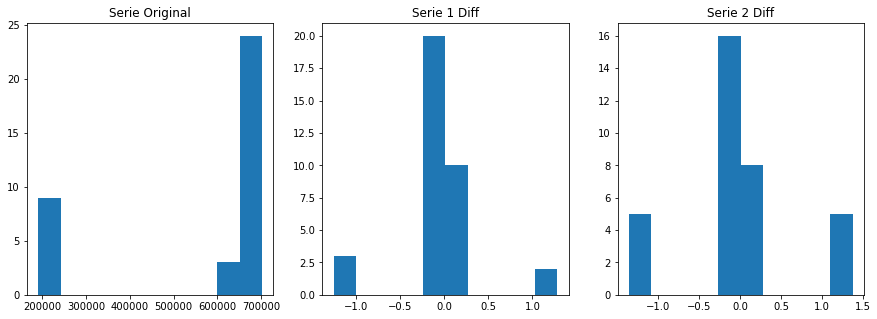

In [58]:
#Verificar a distribuição dos dados
fig,axes = plt.subplots(nrows =1,ncols=3,figsize=(15,5))

axes[0].hist(total['Product Price'])
axes[1].hist(total.Diff_1);
axes[2].hist(total.Diff_2);
axes[0].set_title('Serie Original');
axes[1].set_title('Serie 1 Diff');
axes[2].set_title('Serie 2 Diff');

In [59]:
from scipy import stats
shapiro_test0,a = stats.shapiro(total['Product Price'])
shapiro_test1,b = stats.shapiro(total['Diff_1'])
shapiro_test2,c = stats.shapiro(total['Diff_2'])

print(f'Serie Original: {a}')
print(f'Serie com 1 Diferenciação: {b}')
print(f'Serie com 2 Diferenciações: {c}')

Serie Original: 1.2493728718254715e-08
Serie com 1 Diferenciação: 1.0
Serie com 2 Diferenciações: 1.0


**Os dados com diferenciação segue uma distribuição normal, que é um dos requisitos para fazer previsões**

## Modelagem com SARIMA

In [60]:
#Tester alguns modelos SARIMA
import pmdarima as pm
modelo_p0 = pm.auto_arima(total['Product Price'], start_p=0, start_q=0,
                         test='adf',
                         max_p=12, max_q=12, m=12,
                         start_P=0, seasonal=True,
                         d=0, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=511.835, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=510.462, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=513.475, Time=0.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=521.373, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=508.685, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=511.837, Time=0.02 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=513.836, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=511.912, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=522.299, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=517.630, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 0.562 seconds


In [62]:
#Treinar o modelo SARIMA 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo = SARIMAX(total['Product Price'],order =(0,2,0),seasonal_order=(0,2,0,12)) # Usamos a serie original para determinar os parametros do modelo ARIMA
modelo_p0_P1 = modelo.fit()
print(modelo_p0_P1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Product Price   No. Observations:                   36
Model:             SARIMAX(0, 2, 0)x(0, 2, 0, 12)   Log Likelihood                -117.241
Date:                            Fri, 28 Jan 2022   AIC                            236.482
Time:                                    14:10:50   BIC                            236.785
Sample:                                         0   HQIC                           236.150
                                             - 36                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.864e+08   1.57e+08      3.108      0.002     1.8e+08    7.93e+08
Ljung-Box (L1) (Q):                

**Apesar do teste do modelo Sarima apresentar outros parametros, conseguimos chegar em uma melhor resultado com esses hiperparametros acima**

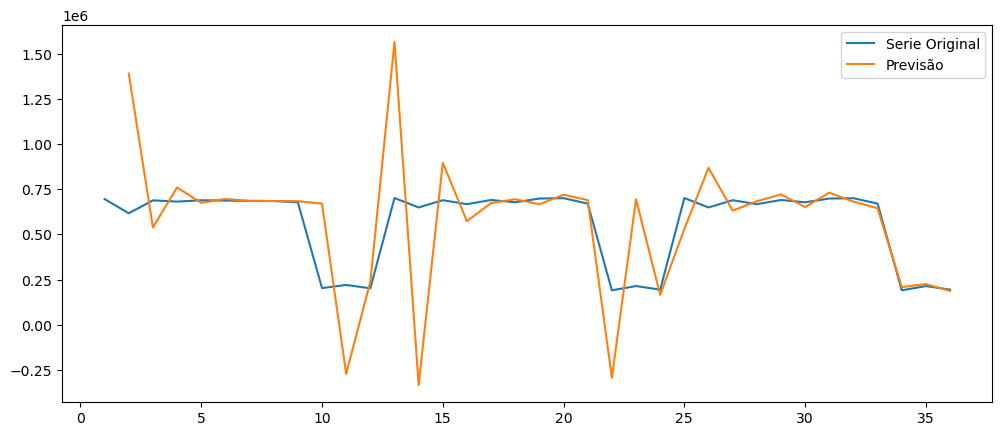

In [63]:
# Dados originais X Previsão com diff 1
plt.figure(figsize=(12,5), dpi=100);
plt.plot(total['Product Price'],label='Serie Original')
plt.plot(modelo_p0_P1.fittedvalues[1:],label='Previsão')
plt.legend();

**Note que a linha de previsão não consegue acompanhar as discrepâncias que há na serie original**

In [77]:
# Criar os dados de treino e teste
train_Sarima = total['Product Price'][:]
test_Sarima = total['Product Price'][30:]

In [78]:
predicoes = modelo_p0_P1.get_prediction(start=-7) # Somente os ultimos 12 periodos
predicao_media =  predicoes.predicted_mean #Plotar a media
int_conf = predicoes.conf_int()
limite_baixo = int_conf.iloc[:,0]#Plotar intervalo de conf da banda de baixo
limite_acima = int_conf.iloc[:,1]#Plotar intervalo de conf da banda acima

In [79]:
datas_previstas = np.asanyarray(predicao_media.index) #Indice das  datas previstas
datas = np.asanyarray(train_Sarima.index) #Todas as datas

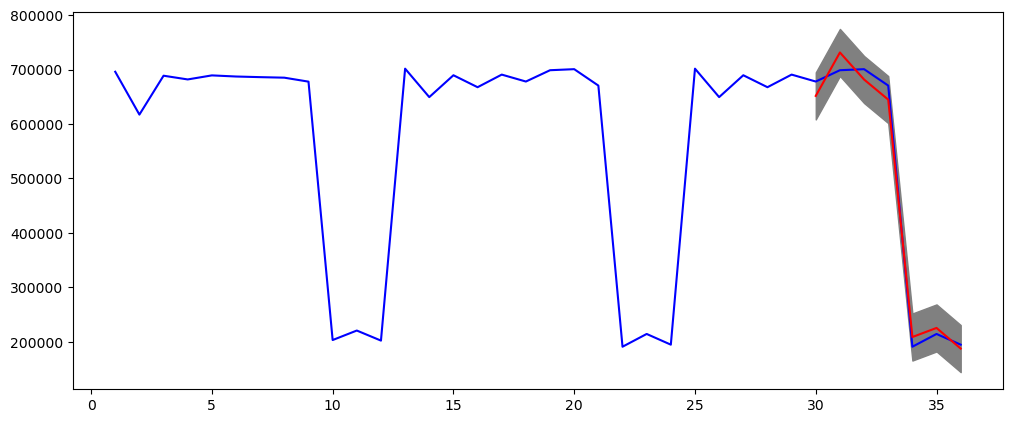

In [81]:
#Previsão com os dados de treino
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_Sarima,color='b',label='Serie_treino')
plt.plot(datas_previstas,predicao_media.values,label='Previsão',color='r');
plt.fill_between(datas_previstas,limite_baixo,limite_acima,color='grey');

**Visualmente podemos perceber que a linha da previsão anda quase junta com a serie original e o intervalo de confiança está acompanhando os dados originais**

# Forecast

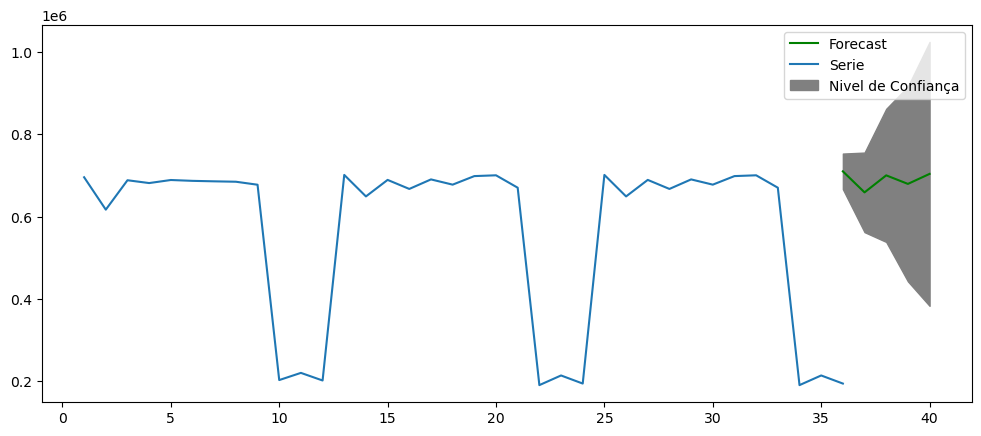

In [82]:
#Forecast para 5 periodos
import warnings
warnings.filterwarnings('ignore')
forecast = modelo_p0_P1.get_forecast(steps=5)  
forecast_medio_Arima_1 =  forecast.predicted_mean #Plotar a media


int_conf_forecast = forecast.conf_int() # Intervalo de confiança
limite_baixo_f = int_conf_forecast.iloc[:,0]#Plotar intervalo de conf da banda de baixo
limite_acima_f = int_conf_forecast.iloc[:,1]#Plotar intervalo de conf da banda acima

datas_forecast = np.asanyarray(forecast_medio_Arima_1.index) #Indice das  datas previstas
predicoes = modelo_p0_P1.get_prediction(start=-12) # Somente os ultimos 12 periodos
predicao_media =  predicoes.predicted_mean #Plotar a media
pred_dates = np.asanyarray(predicao_media.index) #Todas as datas
datas = np.asarray(total.index)

#Previsao com os dados de Teste
plt.figure(figsize=(12,5), dpi=100)
plt.plot(datas_forecast,forecast_medio_Arima_1.values,label='Forecast',color='green');
plt.fill_between(datas_forecast,limite_baixo_f,limite_acima_f,color='grey',label='Nivel de Confiança')



plt.plot(datas,total['Product Price'].values,label='Serie')
plt.legend()
plt.show()

**Não podemos afirmar que a previsão está ou não correta, porém o padrão dos dados foi detectado corretamente pelo modelo**

## Conclusão

**Aplicando o modelo Sarima para previsão de vendas para os proximos 5 meses, chegamos nos seguintes valores:**

In [85]:
#Valores
forcast = pd.DataFrame(forecast_medio_Arima_1)
forcast

,predicted_mean
36,710256.897868
37,659215.706602
38,700544.817731
39,679776.866943
40,704113.297707


# Objetivo_2: Verificar o desempenho da entrega dos produtos

## Carregando os Dados 

In [256]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [272]:
# Variáveis selecionadas

entrega = dados[['order date (DateOrders)','shipping date (DateOrders)','Type','Days for shipping (real)',
                 'Late_delivery_risk','Customer City',
                 'Customer Country','Latitude','Longitude','Order City','Order Country']]
entrega.head(3)

,order date (DateOrders),shipping date (DateOrders),Type,Days for shipping (real),Late_delivery_risk,Customer City,Customer Country,Latitude,Longitude,Order City,Order Country
0,1/31/2018 22:56,2/3/2018 22:56,DEBIT,3,0,Caguas,Puerto Rico,18.251453,-66.037056,Bekasi,Indonesia
1,1/13/2018 12:27,1/18/2018 12:27,TRANSFER,5,1,Caguas,Puerto Rico,18.279451,-66.037064,Bikaner,India
2,1/13/2018 12:06,1/17/2018 12:06,CASH,4,0,San Jose,EE. UU.,37.292233,-121.881279,Bikaner,India


# Dicionário de Dados das variáveis Selecionadas

**$$Variáveis:$$**

**-order date (DateOrders):** Data que foi processado o pedido

**-Type:** Tipo de transação realizada
    
**-Days for shipping (real):** Dias para entrega do produto
    
**-Late_delivery_risk:** Variável categórica que indica se o envio pode atrasar(1) ou não(0).

**-Customer City:** Cidade onde o cliente fez a compra
    
**-Customer Country:** País onde o cliente fez a compra
    
**-Latitude:** Latitude correspondente à localização da loja

**-Longitude:** Longitude correspondente à localização da loja
    
**-Order City:** Cidade de destino do pedido
    
**-Order Country:** País de destino do pedido

In [273]:
#Verificar a média do prazo de entrega dos produtos
entrega['Days for shipping (real)'].mean()

3.4976539865609713

**A média de prazo de entrega é de 3 dias, vamos filtrar apenas os registros que apresentam mais de 3 dias e verificar o motivo do prazo ser maior**

In [259]:
#Filtro do prazo de entrega dos produtos
atraso = entrega[entrega['Days for shipping (real)']>3]
atraso.head(3)

,order date (DateOrders),shipping date (DateOrders),Type,Days for shipping (real),Late_delivery_risk,Customer City,Customer Country,Latitude,Longitude,Order City,Order Country
1,1/13/2018 12:27,1/18/2018 12:27,TRANSFER,5,1,Caguas,Puerto Rico,18.279451,-66.037064,Bikaner,India
2,1/13/2018 12:06,1/17/2018 12:06,CASH,4,0,San Jose,EE. UU.,37.292233,-121.881279,Bikaner,India
5,1/13/2018 11:03,1/19/2018 11:03,TRANSFER,6,0,Tonawanda,EE. UU.,43.013969,-78.879066,Toowoomba,Australia


# Análise Exploratória

In [260]:
#Prazo para entrega do produto
atraso['Days for shipping (real)'].unique()

array([5, 4, 6], dtype=int64)

**Prazo máximo para entrega do produto é de 6 dias**

## Analise dos dados Categoricas X Variável 'Days for shipping (real)'

### type

In [261]:
#Meio de pagamento dos pedidos
type_ = pd.crosstab(atraso['Days for shipping (real)'],atraso.Type)
type_/type_.aggregate(np.sum)

Type,CASH,DEBIT,PAYMENT,TRANSFER
Days for shipping (real),,,,
4,0.335339,0.343589,0.331178,0.322095
5,0.332057,0.326707,0.324611,0.337610
6,0.332604,0.329704,0.344212,0.340295


**A forma de pagamento não influencia no prazo da entrega do produto**

### Late_delivery_risk

In [275]:
#Risco de atraso do pedido
Late_delivery_risk = pd.crosstab(atraso['Days for shipping (real)'],atraso.Late_delivery_risk)
Late_delivery_risk/Late_delivery_risk.aggregate(np.sum)

Late_delivery_risk,0,1
Days for shipping (real),,
4,0.900861,0.110349
5,0.048037,0.440858
6,0.051102,0.448793


**Note que o sistema da empresa tem um bom algoritimo que detecta se o pedido vai atrasar ou não, caso não detecta o risco de atraso, o pedido pode ser entregue em até 4 dias, caso contrário 6 dias**

### Customer City

In [263]:
#Lojas onde levam mais tempo para entregar os produtos
Customer_City = pd.crosstab(atraso['Days for shipping (real)'],atraso['Customer City']).T
Customer_City = Customer_City/Customer_City.aggregate(np.sum)
Customer_City['Total'] = Customer_City.sum(axis=1)
Customer_City= Customer_City.sort_values(by='Total',ascending=False)
Customer_City.head(10)

Days for shipping (real),4,5,6,Total
Customer City,,,,
Caguas,0.368709,0.364166,0.376910,1.109785
Chicago,0.021569,0.021624,0.021203,0.064396
Los Angeles,0.018869,0.018499,0.018000,0.055368
Brooklyn,0.016589,0.017505,0.016781,0.050875
New York,0.009013,0.009836,0.009122,0.027971
Philadelphia,0.009013,0.009587,0.007102,0.025703
Bronx,0.007926,0.008167,0.008216,0.024309
San Diego,0.007751,0.007421,0.007450,0.022622
Miami,0.007190,0.006036,0.007868,0.021094


**A cidade de Caguas de Porto Rico é disparado a que mais atrasa as entregas**

### Customer Country

In [264]:
#País onde há mais atrasos
Customer_Country = pd.crosstab(atraso['Days for shipping (real)'],atraso['Customer Country']).T
Customer_Country = Customer_Country/Customer_Country.aggregate(np.sum)
Customer_Country['Total'] = Customer_Country.sum(axis=1)
Customer_Country= Customer_Country.sort_values(by='Total',ascending=False)
Customer_Country

Days for shipping (real),4,5,6,Total
Customer Country,,,,
EE. UU.,0.615158,0.621063,0.611148,1.847369
Puerto Rico,0.384842,0.378937,0.388852,1.152631


**Apesar da cidade de Caguas de Porto Rico ser a cidade que mais leva tempo para chegada dos pedidos, os EUA é o País que demora mais para entregar os produtos**

In [265]:
#Porcentagem de vendas por País
prp = len(atraso[atraso['Customer Country']=='Puerto Rico'])
euap = len(atraso[atraso['Customer Country']=='EE. UU.'])
porcp = prp/(prp+euap)
porce = euap/(prp+euap)

print(f'Porcentagem de vendas de Porto Rico: {round(porcp,2)*100}')
print(f'Porcentagem de vendas dos Eua: {round(porce,2)*100}')

Porcentagem de vendas de Porto Rico: 38.0
Porcentagem de vendas dos Eua: 62.0


**62% dos pedidos são feitos através das lojas dos Eua, enquanto 38% são das lojas de Porto Rico**

### Order City

In [266]:
#Cidade onde há mais atraso nos pedidos
Order_City = pd.crosstab(atraso['Days for shipping (real)'],atraso['Order City']).T
Order_City = Order_City/Order_City.aggregate(np.sum)
Order_City['Total'] = Order_City.sum(axis=1)
Order_City= Order_City.sort_values(by='Total',ascending=False)
Order_City.head(10)

Days for shipping (real),4,5,6,Total
Order City,,,,
New York City,0.011398,0.012641,0.013160,0.037199
Santo Domingo,0.010942,0.011398,0.013474,0.035814
Los Angeles,0.010241,0.010901,0.009331,0.030472
Tegucigalpa,0.010557,0.009765,0.008599,0.028921
Managua,0.008137,0.008380,0.009470,0.025986
Mexico City,0.006629,0.008735,0.008773,0.024137
Manila,0.008102,0.007102,0.007416,0.022619
San Francisco,0.005927,0.006675,0.007903,0.020506
Philadelphia,0.006839,0.005930,0.007625,0.020393


In [267]:
#Análise Geoespacial 

#Selecionar a cidade de New York City
ny = dados[dados['Order City']=='New York City']

## Transformar as variáveis latitude e longitude em Geometry
import geopandas as gpd
from shapely.geometry import Point
# creating a geometry column 
geometry = [Point(xy) for xy in zip(ny['Longitude'], ny['Latitude'])]


#Criar Geodataframe 
ny_geo = gpd.GeoDataFrame(ny, geometry=geometry)


from folium.plugins import FastMarkerCluster
fmap = folium.Map(location=[40.6643,-73.9385])
j =FastMarkerCluster(ny_geo[['Latitude','Longitude']])
fmap.add_child(j)
fmap

In [268]:
#pedidos feitos pela cidade de New York
p_ny = len(ny_geo)
loja_ny = 288
tot = loja_ny/(loja_ny+p_ny)
print(f'Porcentagem de Pedidos feitos pelas lojas de NY: {round(tot,2)*100}')


Porcentagem de Pedidos feitos pelas lojas de NY: 12.0


**Observamos no gráfico que apenas 288 pedidos de clientes de New York foram entregues pelas lojas de New York, isso representa 12% apenas, há um grave problema na logistica da empresa, sem contar os 823 pedidos que foram realizados pelas lojas de Porto Rico**

### Order Country

In [269]:
#Países dos clientes que mais atrasam os pedidos
Order_Country = pd.crosstab(atraso['Days for shipping (real)'],atraso['Order Country']).T
Order_Country = Order_Country/Order_Country.aggregate(np.sum)
Order_Country['Total'] = Order_Country.sum(axis=1)
Order_Country= Order_Country.sort_values(by='Total',ascending=False)
Order_Country.head(10)

Days for shipping (real),4,5,6,Total
Order Country,,,,
Estados Unidos,0.139200,0.135603,0.137834,0.412637
México,0.071055,0.071406,0.079031,0.221492
Francia,0.069968,0.073288,0.074957,0.218213
Alemania,0.050468,0.056706,0.053024,0.160198
Australia,0.048539,0.049178,0.046061,0.143778
Brasil,0.043138,0.043142,0.048184,0.134464
Reino Unido,0.039631,0.037354,0.041535,0.118520
China,0.032792,0.031140,0.032900,0.096833
Italia,0.027777,0.027128,0.025241,0.080146


**Os Eua é de longe o país que mais atrasa a entrega dos produtos**

In [270]:
#Análise Geoespacial 
geo = dados[['Order Country','Customer Country','Latitude','Longitude']]
geo = geo[geo['Order Country']=='Estados Unidos']

## Transformar as variáveis latitude e longitude em Geometry
import geopandas as gpd
from shapely.geometry import Point
# creating a geometry column 
geometry = [Point(xy) for xy in zip(geo['Longitude'], geo['Latitude'])]


#Criar Geodataframe 
geo = gpd.GeoDataFrame(geo, geometry=geometry)
geo.head(5)

fmap = folium.Map()
j =FastMarkerCluster(geo[['Latitude','Longitude']])
fmap.add_child(j)
fmap

In [271]:
#Porcentagem de clientes do EUA  que Compraram em Puerto Rico
eua = geo[geo['Customer Country']=='Puerto Rico']
round(len(eua)/((len(eua))+(len(geo)))*100,2)

27.45

**27% dos pedidos feitos por clientes dos EUA são feitos em lojas de Porto Rico**

# Conclusão:

**Analisandos os Países e as cidades que mais atrasam as entregas, observamos que na maioria dos casos o problema está sendo na logistica da empresa, pois clientes que fazem pedido de um produto onde possuem loja na mesma cidade, o produto está sendo entregue de outra cidade ou até mesmo de outro país** 

# Objetivo_3: Analisar o controle de estoque da empresa

## Carregando os Dados 

In [595]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [596]:
# Variáveis selecionadas

estoque = dados[['Customer Country','Customer City','Customer Id',
                'Customer State','Order City','Order Country',
                 'Order Item Id','Order Item Quantity','Product Card Id','Product Name','Latitude','Longitude']]
estoque.head(3)

,Customer Country,Customer City,Customer Id,Customer State,Order City,Order Country,Order Item Id,Order Item Quantity,Product Card Id,Product Name,Latitude,Longitude
0,Puerto Rico,Caguas,20755,PR,Bekasi,Indonesia,180517,1,1360,Smart watch,18.251453,-66.037056
1,Puerto Rico,Caguas,19492,PR,Bikaner,India,179254,1,1360,Smart watch,18.279451,-66.037064
2,EE. UU.,San Jose,19491,CA,Bikaner,India,179253,1,1360,Smart watch,37.292233,-121.881279


# Dicionário de Dados das variáveis Selecionadas

**$$Variáveis:$$**

**Customer Country:** País onde o cliente fez a compra

**-Customer City:** Cidade onde o cliente fez a compra
    
**-Customer Id:** ID do cliente
    
**-Customer State:** Estado ao qual pertence a loja onde a compra está registrada

**-Order City:** Cidade de destino do pedido

**-Order Country:** País de destino do pedido
    
**-Order Item Id:** Código do item do pedido
    
**-Order Item Quantity:** Quantidade de itens do pedido

**-Product Card Id:** código do produto

**-Product Name:** Nome do produto

**-Latitude:** Latitude correspondente à localização da loja

**-Longitude:** Longitude correspondente à localização da loja



In [597]:
#Produtos que mais vende
pdp = pd.DataFrame(estoque['Product Card Id'].value_counts(ascending=False))

#Add nome dos produtos
name = estoque[['Product Name','Product Card Id']].set_index('Product Card Id')
name = pd.DataFrame(m.groupby('Product Card Id')['Product Name'].sum())
pdp['Names'] = name['Product Name']
pdp.head(15)

,Product Card Id,Names
365,24515,Perfect Fitness Perfect Rip DeckPerfect Fitnes...
403,22246,Nike Men's CJ Elite 2 TD Football CleatNike Me...
502,21035,Nike Men's Dri-FIT Victory Golf PoloNike Men's...
1014,19298,O'Brien Men's Neoprene Life VestO'Brien Men's ...
1004,17325,Field & Stream Sportsman 16 Gun Fire SafeField...
1073,15500,Pelican Sunstream 100 KayakPelican Sunstream 1...
957,13729,Diamondback Women's Serene Classic Comfort BiD...
191,12169,Nike Men's Free 5.0+ Running ShoeNike Men's Fr...
627,10617,Under Armour Girls' Toddler Spine Surge RunniU...
1362,838,Fighting video gamesFighting video gamesFighti...


**Vamos selecionar os 3 primeiros produtos que mais vendem para controle de estoque**

In [598]:
# Selecionando os 3 primeiros produtos que mais vendem
um = estoque[estoque['Product Card Id']==365]
dois = estoque[estoque['Product Card Id']==403]
tres = estoque[estoque['Product Card Id']==502]

estoque1 = pd.concat([um,dois])
estoque1 = pd.concat([estoque1,tres])
estoque1.head(5)

,Customer Country,Customer City,Customer Id,Customer State,Order City,Order Country,Order Item Id,Order Item Quantity,Product Card Id,Product Name,Latitude,Longitude
48,Puerto Rico,Bayamon,9083,PR,Mirzapur,India,71956,2,365,Perfect Fitness Perfect Rip Deck,18.380119,-66.183128
57,Puerto Rico,Caguas,7864,PR,San Francisco,Estados Unidos,80250,2,365,Perfect Fitness Perfect Rip Deck,18.282795,-66.370560
58,Puerto Rico,Caguas,11169,PR,Overland Park,Estados Unidos,86866,2,365,Perfect Fitness Perfect Rip Deck,18.274662,-66.370583
66,Puerto Rico,Caguas,650,PR,Groningen,Países Bajos,45253,3,365,Perfect Fitness Perfect Rip Deck,18.227573,-66.045631
67,Puerto Rico,Caguas,9353,PR,Gateshead,Reino Unido,156394,3,365,Perfect Fitness Perfect Rip Deck,18.298821,-66.370598


In [599]:
#Porcentagem de pedidos por País
p_pr =len(estoque1[estoque1['Customer Country']=='Puerto Rico'])
p_eua = len(estoque1)-p_pr

pr = p_pr/(p_pr+p_eua)
eua = p_eua/(p_pr+p_eua)

print(f'Porcentagem de pedidos nos Eua: {round(eua,2)*100}')
print(f'Porcentagem de pedidos em Porto Rico: {round(pr,2)*100}')

Porcentagem de pedidos nos Eua: 61.0
Porcentagem de pedidos em Porto Rico: 39.0


**Não temos uma diferença muito grande entre os pedidos nos EUA ou em Porto Rico, comparado com o tamanho territorial de cada país**

In [600]:
#Verificar quantos estados de cada país saem mais pedidos
qts_reg = len(estoque1['Customer State'].unique())
print(f'Quantidade Total de Região para os 3 produtos mais vendidos: {qts_reg}')

reg_eua = estoque1[estoque1['Customer Country']=='EE. UU.']
reg_eua = len(reg_eua.groupby('Customer State').count())
print(f'Quantidade de Região nos EUA: {reg_eua}')


reg_pr = estoque1[estoque1['Customer Country']=='Puerto Rico']
reg_pr = len(reg_pr.groupby('Customer State').count())
print(f'Quantidade de Região em Porto Rico: {reg_pr}')


Quantidade Total de Região para os 3 produtos mais vendidos: 44
Quantidade de Região nos EUA: 43
Quantidade de Região em Porto Rico: 1


**Apesar de 39% dos pedidos serem feitos em Porto Rico, temos apenas 1 região para traçar toda logistica de entrega, enquanto os EUA tem 44 regiões**

In [601]:
#Verificar os países onde há mais entrega dos produtos
ent_pais = pd.DataFrame(estoque1.groupby('Order Country')['Order Item Quantity'].sum())
ent_pais= ent_pais.sort_values(by='Order Item Quantity',ascending=False)
ent_pais.head(10)

,Order Item Quantity
Order Country,
Estados Unidos,23295
México,12107
Francia,11562
Alemania,8226
Brasil,7320
Reino Unido,6356
Australia,6317
Italia,4221
China,4179


**Vamos filtrar os 3 países onde há mais entregas dos pedidos**

In [602]:
# Filtrar os 3 países onde há mais entregas dos produtos
um = estoque1[estoque1['Order Country']=='Estados Unidos']
dois = estoque1[estoque1['Order Country']=='México']
tres = estoque1[estoque1['Order Country']=='Francia']

estoque2 = pd.concat([um,dois])
estoque2 = pd.concat([estoque2,tres])
estoque2.head()

,Customer Country,Customer City,Customer Id,Customer State,Order City,Order Country,Order Item Id,Order Item Quantity,Product Card Id,Product Name,Latitude,Longitude
57,Puerto Rico,Caguas,7864,PR,San Francisco,Estados Unidos,80250,2,365,Perfect Fitness Perfect Rip Deck,18.282795,-66.370560
58,Puerto Rico,Caguas,11169,PR,Overland Park,Estados Unidos,86866,2,365,Perfect Fitness Perfect Rip Deck,18.274662,-66.370583
187,EE. UU.,Corona,9174,NY,Fresno,Estados Unidos,86191,3,365,Perfect Fitness Perfect Rip Deck,40.742107,-73.869621
188,EE. UU.,Cincinnati,122,OH,Peoria,Estados Unidos,83892,3,365,Perfect Fitness Perfect Rip Deck,39.288494,-84.355118
189,EE. UU.,Germantown,3800,MD,Cincinnati,Estados Unidos,81596,3,365,Perfect Fitness Perfect Rip Deck,39.183659,-77.265457


In [603]:
#Shape
estoque2.shape

(19980, 12)

### Analise do controle de estoque para entrega no México

In [604]:
#Filtrar somente o País México
MX = estoque2[estoque2['Order Country']=='México']
len(MX)

5133

**São 5.133 registros de entrega no México**

In [605]:
#Análise Geoespacial 

## Transformar as variáveis latitude e longitude em Geometry
geoo = MX.copy()
# creating a geometry column 
geometry = [Point(xy) for xy in zip(geoo['Longitude'], geoo['Latitude'])]


#Criar Geodataframe 
ny_geo = gpd.GeoDataFrame(geoo, geometry=geometry)


from folium.plugins import FastMarkerCluster
fmap = folium.Map()
j =FastMarkerCluster(geoo[['Latitude','Longitude']])
fmap.add_child(j)
fmap

**Podemos observar que as regiões do 'Texas','New Mexico','Arizona' e 'Los Angeles', são as regiões onde tem loja da empresa que fazem fronteira com o Mexico e as entregas dos produtos fazem mais sentido por essas regiões** 

In [606]:
#Filtrar as regiões que fazem fronteira com o Mexico
sa = MX[MX["Customer State"]=='LA']
tx = MX[MX["Customer State"]=='TX']
az = MX[MX["Customer State"]=='AZ']
nm = MX[MX["Customer State"]=='NM']

front_MX = pd.concat([sa,tx])
front_MX = pd.concat([front_MX,az])
front_MX = pd.concat([front_MX,nm])
len(front_MX)

380

**380 entregas são feitas no Mexico pelas regiões dos EUA que fazem fronteira com o Mexico**

In [607]:
#Numero de entregas no Mexico por Porto Rico
len(MX[MX['Customer Country']=='Puerto Rico'])

2003

**2.003 entregas são feitas no Mexico pelo País Porto Rico**

In [608]:
#Numero de entregas no Mexico pelos EUA
len(MX[MX['Customer Country']=='EE. UU.'])

3130

**3.130 entregas são feitas no Mexico pelos EUA**

In [609]:
# Produto que mais é vendido no Mexico
pd.DataFrame(MX.groupby('Product Card Id')['Order Item Quantity'].sum()).reset_index()

,Product Card Id,Order Item Quantity
0,365,5626
1,403,1728
2,502,4753


**Os produtos com Id '365' e '502' são os mais entregues no Mexico, é primordial que as regiões de 'Texas','New Mexico','Arizona' e 'Los Angeles' tenham os produtos em estoque**

### Analise do controle de estoque para entrega no França

In [610]:
#Filtrar somente o País da França
FR = estoque2[estoque2['Order Country']=='Francia']
len(FR)

4899

**São 4.899 registros de entrega na França**

In [611]:
#Análise Geoespacial 

## Transformar as variáveis latitude e longitude em Geometry
geoo = FR.copy()
# creating a geometry column 
geometry = [Point(xy) for xy in zip(geoo['Longitude'], geoo['Latitude'])]


#Criar Geodataframe 
fran_geo = gpd.GeoDataFrame(geoo, geometry=geometry)


from folium.plugins import FastMarkerCluster
fmap = folium.Map()
j =FastMarkerCluster(fran_geo[['Latitude','Longitude']])
fmap.add_child(j)
fmap

In [612]:
#Quantidade de região que entrega os produtos na frança
len(FR['Customer State'].unique())

44

**A empresa tem 44 lojas de regiões diferentes onde faz entrega para a França, a empresa deveria concentrar as entregas em algumas regiões apenas, pois assim evitaria transtorno e despesas desnecessárias nos envios dos produtos**

### Analise do controle de estoque para entrega nos EUA

In [613]:
#Filtrar somente o País da França
EUA = estoque2[estoque2['Order Country']=='Estados Unidos']
len(EUA)

9948

**São 9.9948 registros de entrega nos EUA**

In [614]:
#Análise Geoespacial 

## Transformar as variáveis latitude e longitude em Geometry
geoo = EUA.copy()
# creating a geometry column 
geometry = [Point(xy) for xy in zip(geoo['Longitude'], geoo['Latitude'])]


#Criar Geodataframe 
EUA_geo = gpd.GeoDataFrame(geoo, geometry=geometry)


from folium.plugins import FastMarkerCluster
fmap = folium.Map()
j =FastMarkerCluster(EUA_geo[['Latitude','Longitude']])
fmap.add_child(j)
fmap

In [615]:
#Numero de entregas no EUA pelo EUA
len(EUA[EUA['Customer Country']=='EE. UU.'])

6152

In [616]:
#Numero de entregas no EUA por Porto Rico
len(EUA[EUA['Customer Country']=='Puerto Rico'])

3796

**Mais da metade das entrega nos EUA foram feitas por Porto Rico**

# Conclusão:

**O controle do estoque está sendo feito de maneira errada, os envios dos produtos precisa ser feito da região correta e mais próxima do destino, como os envios estão praticamente sendo enviados de maneira aleatória, pode estar havendo um acumulo de produtos em estoque que nunca serão utilizados e pode faltar produtos que poderiam ser entregues rapidamente em locais mais próximos.**

# Objetivo_4: Regras de Associação 

## Carregar os dados

In [617]:
# Carrega os dados
dados = pd.read_csv("dados/DataCoSupplyChainDataset.csv", encoding = 'latin1')
dados.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [764]:
f = dados[['Customer Fname', 'Product Name']]
f= pd.get_dummies(f,prefix=['Product Name'], columns = ['Product Name']).set_index('Customer Fname')
f


,Product Name_Adult dog supplies,Product Name_Baby sweater,Product Name_Bag Boy Beverage Holder,Product Name_Bag Boy M330 Push Cart,Product Name_Bowflex SelectTech 1090 Dumbbells,Product Name_Bridgestone e6 Straight Distance NFL Carolina,Product Name_Bridgestone e6 Straight Distance NFL San Dieg,Product Name_Bridgestone e6 Straight Distance NFL Tennesse,Product Name_Brooks Women's Ghost 6 Running Shoe,Product Name_Bushnell Pro X7 Jolt Slope Rangefinder,...,Product Name_Under Armour Women's Ignite Slide,Product Name_Under Armour Women's Micro G Skulpt Running S,Product Name_Web Camera,Product Name_Yakima DoubleDown Ace Hitch Mount 4-Bike Rack,Product Name_adidas Brazuca 2014 Official Match Ball,Product Name_adidas Kids' F5 Messi FG Soccer Cleat,Product Name_adidas Men's F10 Messi TRX FG Soccer Cleat,Product Name_adidas Men's Germany Black Crest Away Tee,Product Name_adidas Youth Germany Black/Red Away Match Soc,Product Name_insta-bed Neverflat Air Mattress
Customer Fname,,,,,,,,,,,,,,,,,,,,,
Cally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Irene,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gillian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Orli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Maria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ronald,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [766]:
#Regras de associação verificar o suporte acima de 1%
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(f, min_support =  0.00015, use_colnames = True)
frequent_itemsets = frequent_itemsets.sort_values(by=['support'], ascending = False)
frequent_itemsets

,support,itemsets
69,0.135803,(Product Name_Perfect Fitness Perfect Rip Deck)
54,0.123234,(Product Name_Nike Men's CJ Elite 2 TD Footbal...
57,0.116525,(Product Name_Nike Men's Dri-FIT Victory Golf ...
65,0.106903,(Product Name_O'Brien Men's Neoprene Life Vest)
22,0.095973,(Product Name_Field & Stream Sportsman 16 Gun ...
...,...,...
28,0.000194,(Product Name_Garmin Forerunner 910XT GPS Watch)
88,0.000188,(Product Name_Titleist Club Glove Travel Cover)
34,0.000177,(Product Name_GoPro HERO3+ Black Edition Camera)
17,0.000161,(Product Name_Diamondback Boys' Insight 24 Per...


In [767]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.sort_values(by=['lift'], ascending = False).drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis=1)

,antecedents,consequents,support,confidence,lift


In [768]:
df_ar = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
